In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset - make sure the CSV file is in the same directory as this notebook
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# --- Initial Data Inspection ---
print("DataFrame Shape:", df.shape)
print("\n--- First 5 rows ---\n", df.head())
print("\n--- Column Info & Data Types ---\n")
df.info()
print("\n--- Missing Values (Count) ---\n", df.isnull().sum())
print("\n--- Descriptive Statistics for Numerical Columns ---\n", df.describe())

DataFrame Shape: (7043, 21)

--- First 5 rows ---
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSuppo

In [7]:
# Convert 'TotalCharges' to numeric, coercing errors (e.g., empty strings) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many NaNs were introduced (these are likely rows where TotalCharges was empty)
print("\n--- Missing values after converting TotalCharges ---\n", df.isnull().sum())

# Handle the few missing values in TotalCharges (if any were created)
# Option 1: Fill with the median (good for numerical data, less sensitive to outliers)
# df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
# Option 2: Drop rows with NaN (if only a few, and you don't mind losing data)
df.dropna(inplace=True)

# Verify the type conversion and missing value handling
print("\n--- Info after TotalCharges conversion and NaN handling ---\n")
df.info()


--- Missing values after converting TotalCharges ---
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

--- Info after TotalCharges conversion and NaN handling ---

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4 

In [9]:
# Count unique values in the 'Churn' column (useful for target variable)
print("\n--- Churn Distribution ---\n", df['Churn'].value_counts())

# Count unique values in 'Contract'
print("\n--- Contract Type Distribution ---\n", df['Contract'].value_counts())

# Filter data: Customers with 'Fiber optic' internet service
fiber_customers = df[df['InternetService'] == 'Fiber optic']
print("\n--- Head of Fiber Optic Customers ---\n", fiber_customers.head())

# Calculate average MonthlyCharges for churned vs. non-churned customers
avg_charges_churn = df.groupby('Churn')['MonthlyCharges'].mean()
print("\n--- Average Monthly Charges by Churn ---\n", avg_charges_churn)


--- Churn Distribution ---
 Churn
No     5163
Yes    1869
Name: count, dtype: int64

--- Contract Type Distribution ---
 Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

--- Head of Fiber Optic Customers ---
     customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   

   MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
4             No     Fiber optic             No  ...               No   
5            Yes     Fiber optic             No  ...              Yes   
6            Yes     Fiber o

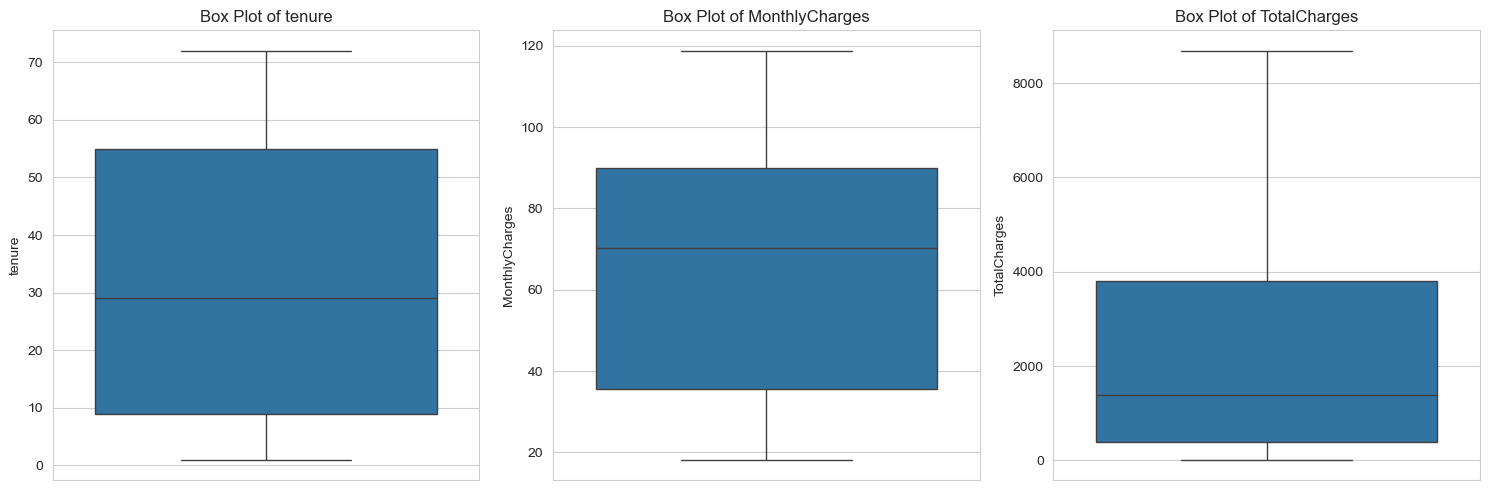

In [11]:
# Set the style for the plots
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Create box plots for numerical columns to identify outliers
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

--- Correlation Matrix ---
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


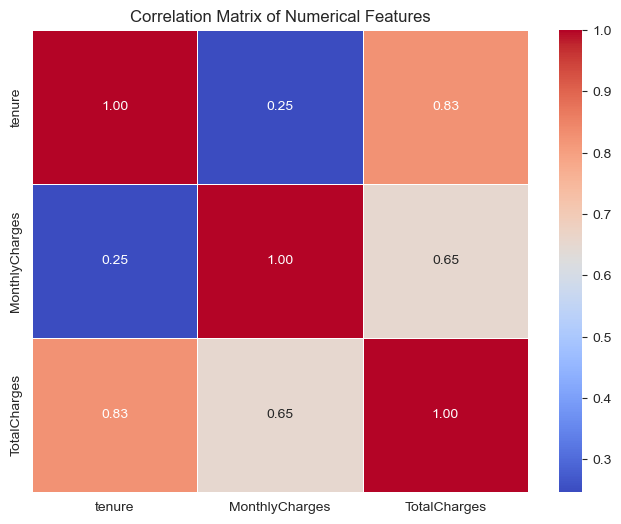

In [15]:
# Calculate the correlation matrix for numerical columns
# Note: df.corr() will automatically select numerical columns if not specified
correlation_matrix = df[numerical_cols].corr()

print("--- Correlation Matrix ---")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

C:\Users\Jerem\AppData\Local\Temp\ipykernel_16212\1593987461.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, hue='Churn' if col != 'Churn' else None, palette='viridis')


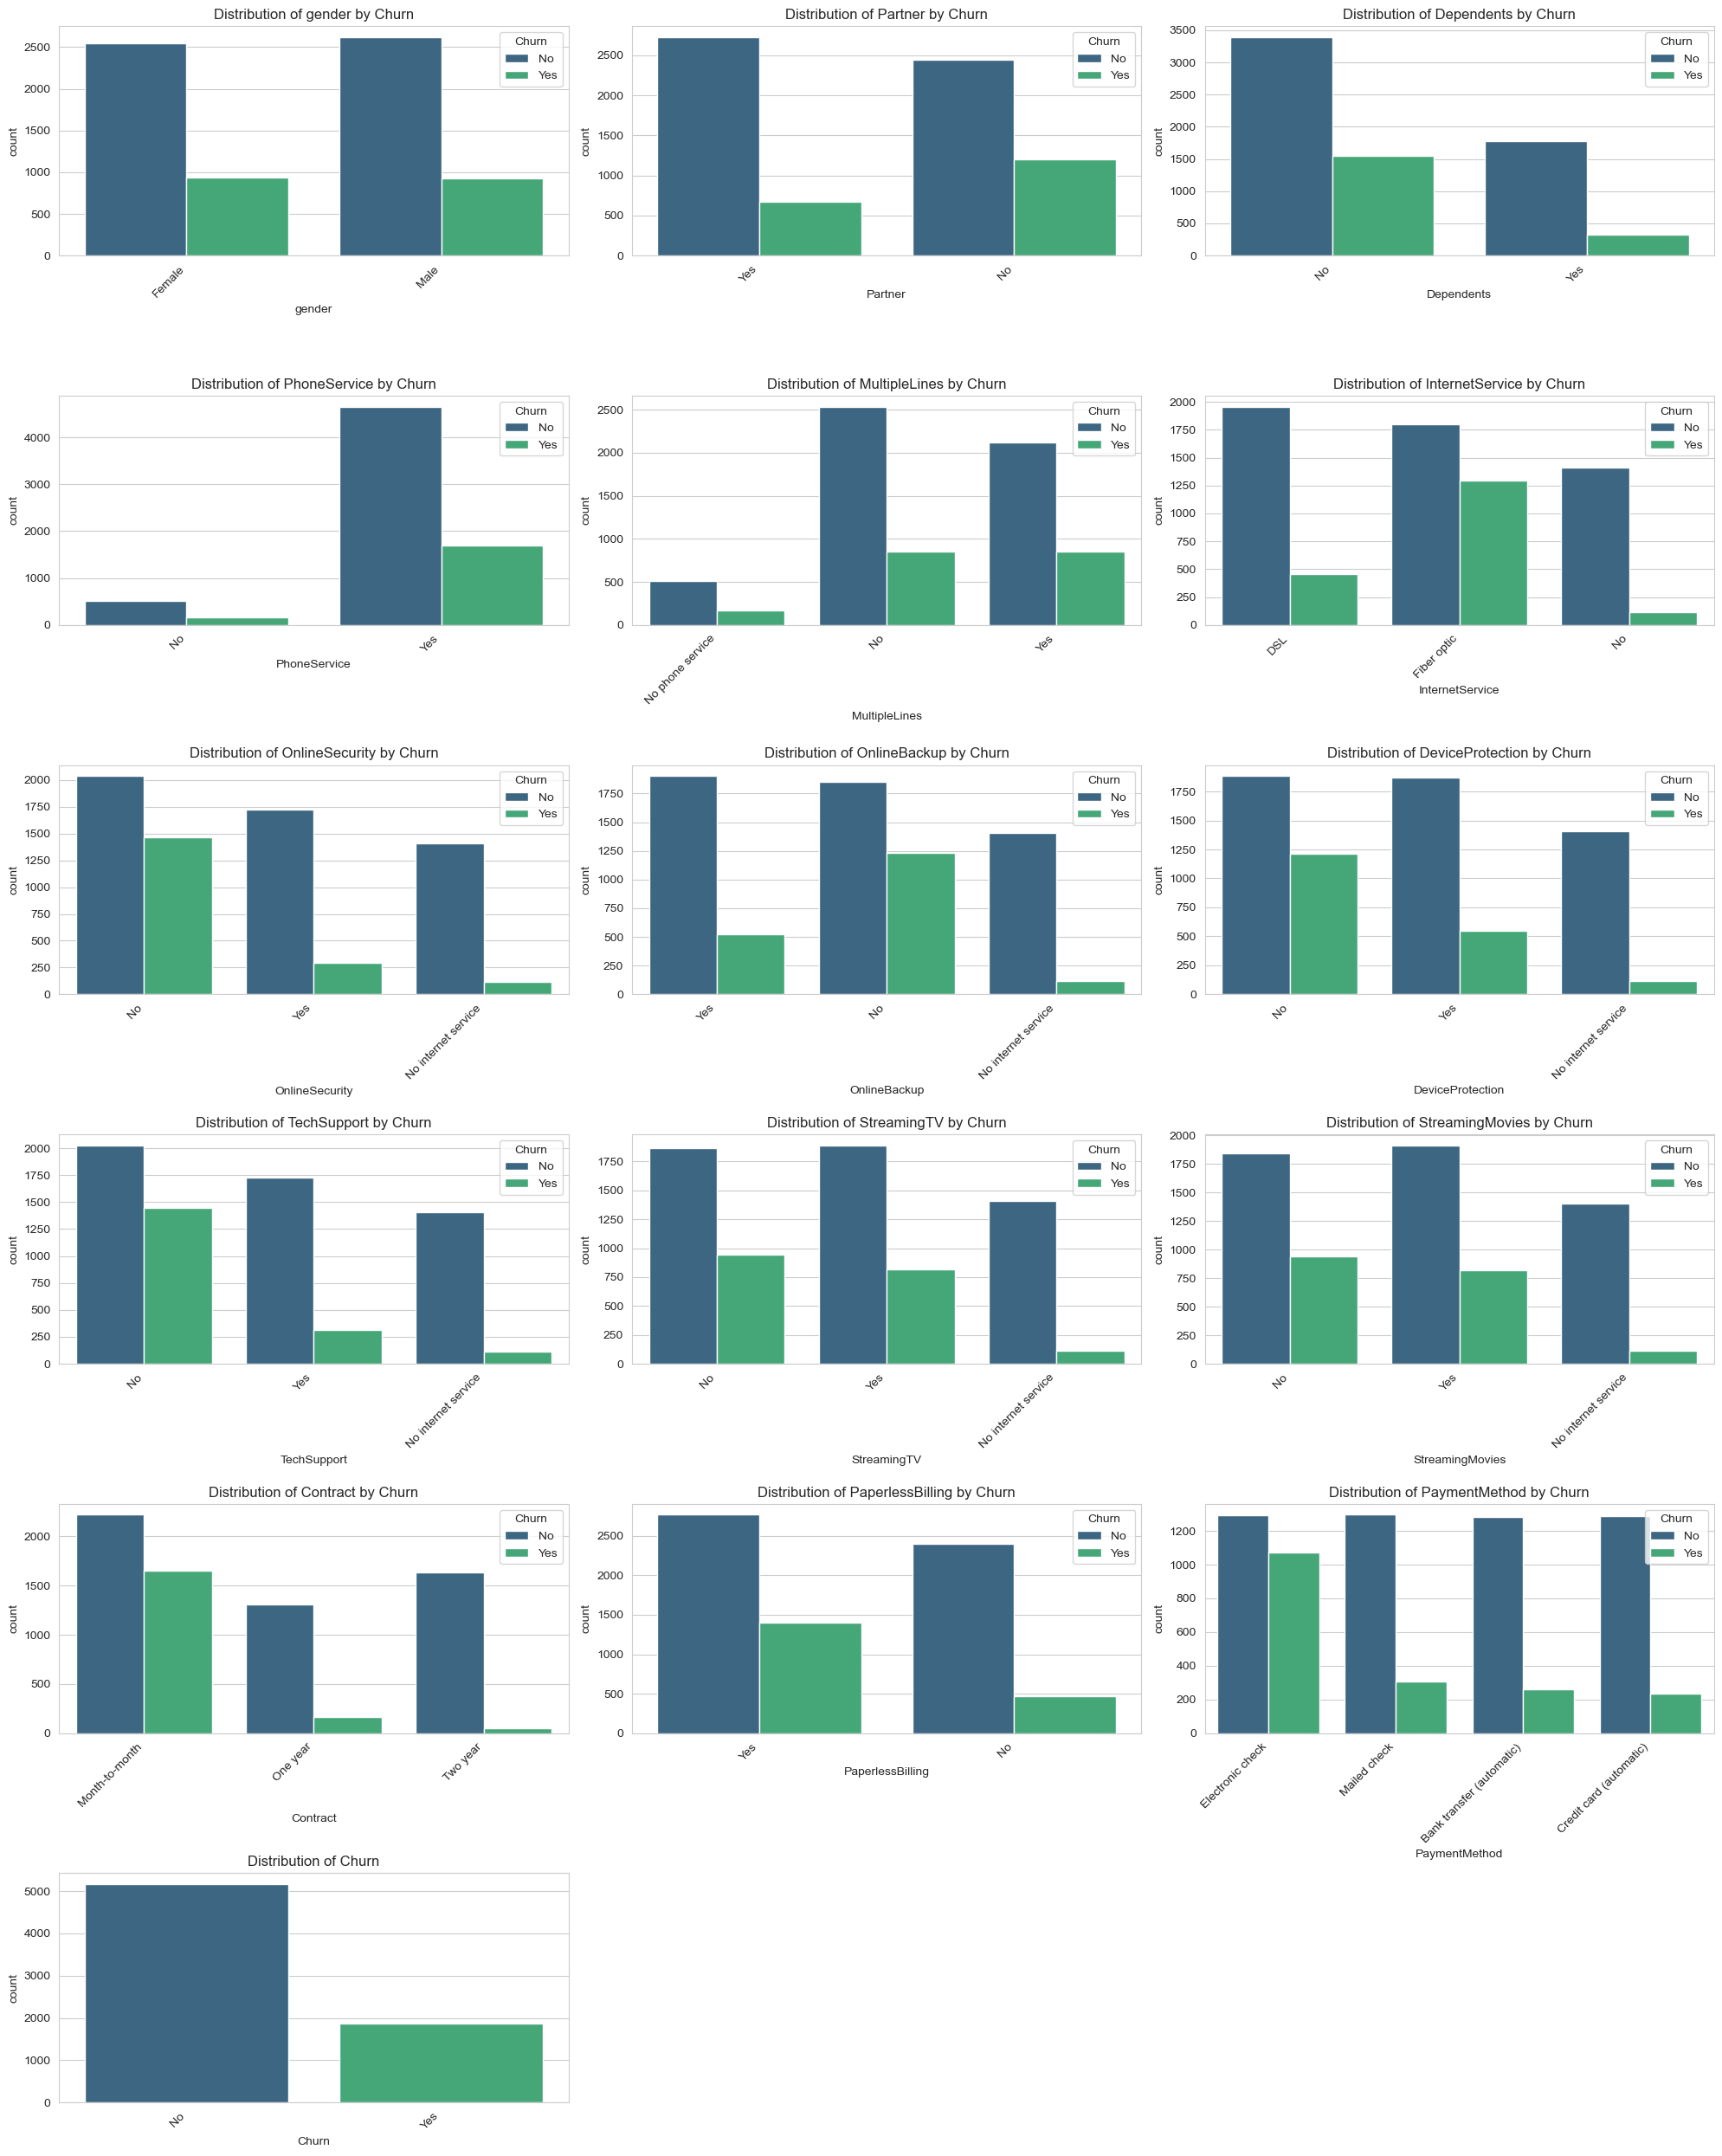

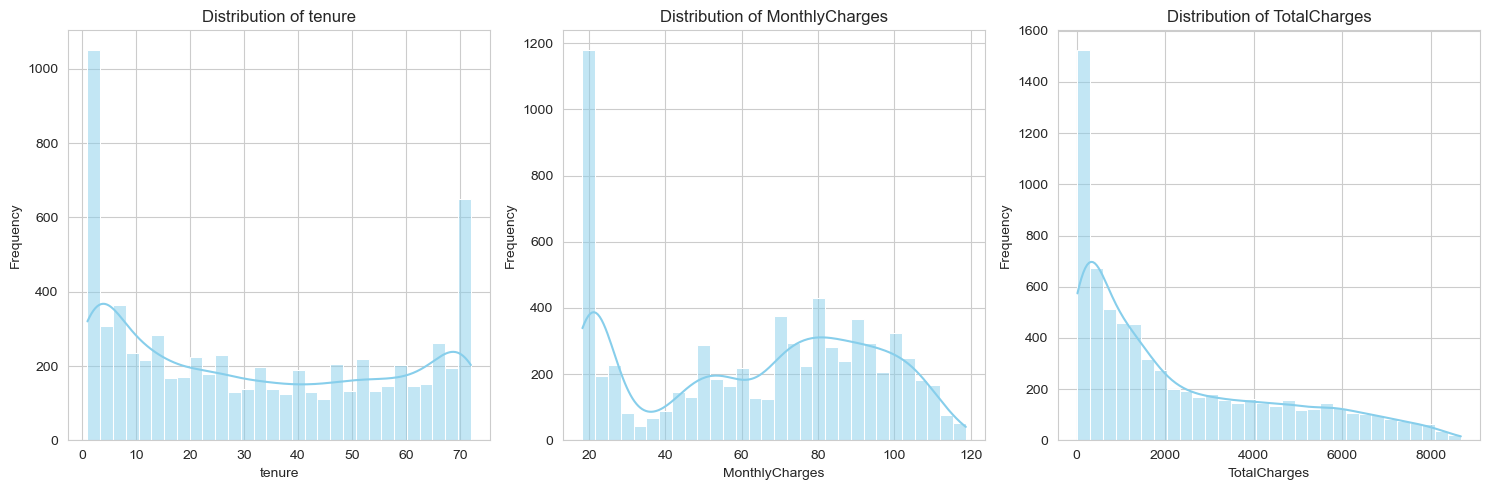

C:\Users\Jerem\AppData\Local\Temp\ipykernel_16212\1593987461.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')
C:\Users\Jerem\AppData\Local\Temp\ipykernel_16212\1593987461.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='pastel')


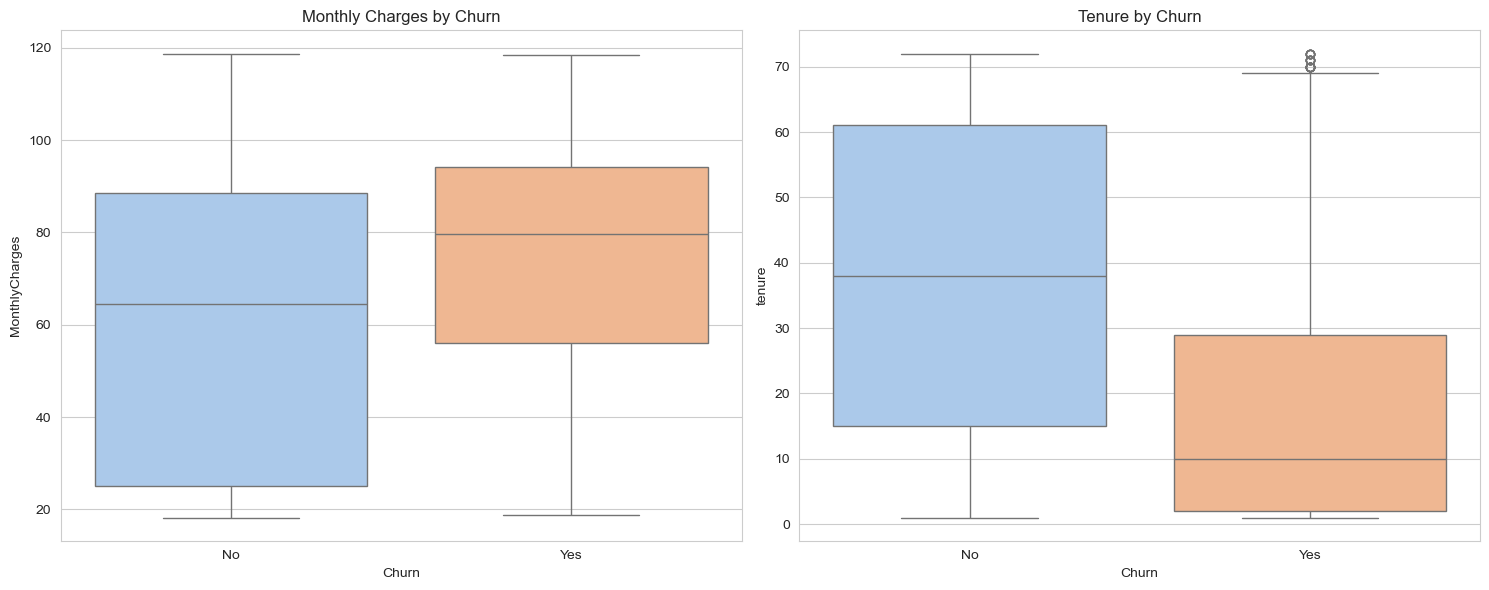

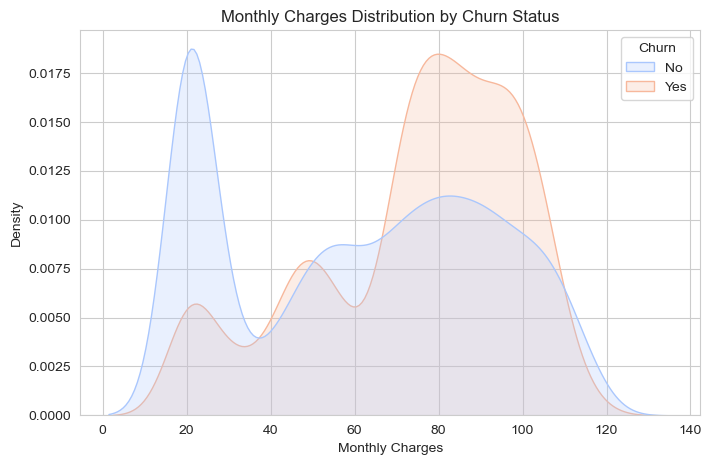

In [17]:
# --- Visualizing Categorical Feature Distributions ---
# This shows the count of each category for important features and their relation to Churn.

categorical_cols_to_plot = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                           'InternetService', 'OnlineSecurity', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(6, 3, i + 1) # Adjust subplot grid as needed for your columns
    sns.countplot(data=df, x=col, hue='Churn' if col != 'Churn' else None, palette='viridis')
    plt.title(f'Distribution of {col}' + (' by Churn' if col != 'Churn' else ''))
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout()
plt.show()

# --- Visualizing Numerical Feature Distributions (Histograms) ---
# Histograms help you understand the spread and shape of your numerical data.

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols): # Re-using numerical_cols from earlier
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- Visualizing Numerical Feature vs. Churn (Box Plots & KDE) ---
# Box plots show spread and median for numerical features across churn categories.
# KDE plots (Kernel Density Estimate) can show the probability density of a numerical variable for different categories.

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='pastel')
plt.title('Monthly Charges by Churn')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='tenure', palette='pastel')
plt.title('Tenure by Churn')

plt.tight_layout()
plt.show()

# Example KDE plot for MonthlyCharges by Churn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette='coolwarm')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

In [20]:
import pandas as pd

# Identify categorical columns that need encoding
# Exclude 'customerID' as it's an identifier, and 'Churn' as it's our target variable (already Yes/No, will be mapped later if needed)
# Also exclude numerical columns we've already dealt with
categorical_features_for_encoding = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Apply One-Hot Encoding
# drop_first=True prevents multicollinearity by dropping one category per feature
df_encoded = pd.get_dummies(df, columns=categorical_features_for_encoding, drop_first=True)

# Map the 'Churn' target variable to numerical (Yes=1, No=0)
# This is a specific type of encoding for the binary target variable
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

print("--- DataFrame after One-Hot Encoding (first 5 rows) ---")
print(df_encoded.head())

print("\n--- New DataFrame Shape after Encoding ---")
print(df_encoded.shape)

print("\n--- Info of Encoded DataFrame (check dtypes) ---")
df_encoded.info()

--- DataFrame after One-Hot Encoding (first 5 rows) ---
   customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0  7590-VHVEG              0       1           29.85         29.85      0   
1  5575-GNVDE              0      34           56.95       1889.50      0   
2  3668-QPYBK              0       2           53.85        108.15      1   
3  7795-CFOCW              0      45           42.30       1840.75      0   
4  9237-HQITU              0       2           70.70        151.65      1   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False         True           False             False  ...   
1         True        False           False              True  ...   
2         True        False           False              True  ...   
3         True        False           False             False  ...   
4        False        False           False              True  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0    

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X will contain all features (all columns except 'customerID' and 'Churn')
# customerID is an identifier and should not be used as a feature for prediction
X = df_encoded.drop(columns=['customerID', 'Churn'])

# y will contain the target variable ('Churn')
y = df_encoded['Churn']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Shape of Training Features (X_train) ---")
print(X_train.shape)

print("\n--- Shape of Test Features (X_test) ---")
print(X_test.shape)

print("\n--- Shape of Training Target (y_train) ---")
print(y_train.shape)

print("\n--- Shape of Test Target (y_test) ---")
print(y_test.shape)

--- Shape of Training Features (X_train) ---
(5625, 30)

--- Shape of Test Features (X_test) ---
(1407, 30)

--- Shape of Training Target (y_train) ---
(5625,)

--- Shape of Test Target (y_test) ---
(1407,)


--- Training Logistic Regression Model ---


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training complete.

--- Model Evaluation ---
Accuracy Score: 0.7882

Confusion Matrix:
[[916 117]
 [181 193]]


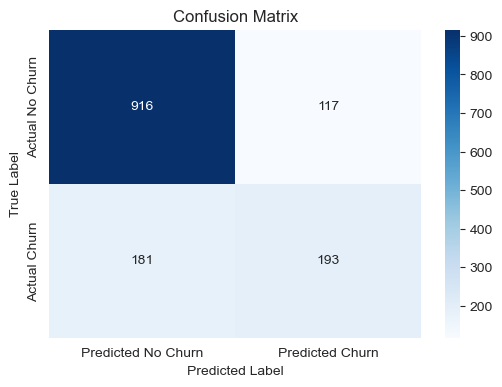


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, X_test, y_train, y_test are already defined from the previous step

# 1. Initialize the Logistic Regression model
# max_iter is increased to ensure convergence, especially with complex datasets
model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model using the training data
print("--- Training Logistic Regression Model ---")
model.fit(X_train, y_train)
print("Model training complete.")

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model's performance

print("\n--- Model Evaluation ---")

# Accuracy Score: Proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Confusion Matrix: Shows correct vs. incorrect classifications for each class
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Classification Report: Provides Precision, Recall, and F1-score for each class
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

--- Training Logistic Regression Model (without SMOTE) ---
Model training complete.

--- Calculating and Plotting ROC Curve for Logistic Regression Model ---


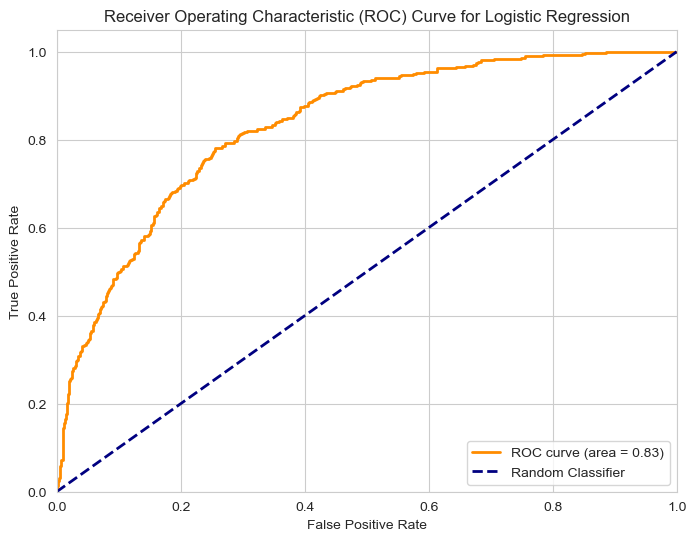


ROC AUC Score for Logistic Regression: 0.8320

Classification Report (Logistic Regression without SMOTE):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report

# --- 1. Data Loading and Initial Cleaning ---
# (Assuming WA_Fn-UseC_-Telco-Customer-Churn.csv is in the working directory)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# --- 2. Categorical Encoding ---
categorical_features_for_encoding = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
df_encoded = pd.get_dummies(df, columns=categorical_features_for_encoding, drop_first=True)
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# --- 3. Feature/Target Separation and Data Splitting ---
X = df_encoded.drop(columns=['customerID', 'Churn'])
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Feature Scaling ---
numerical_cols_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train_scaled_arr = scaler.fit_transform(X_train[numerical_cols_for_scaling])
X_test_scaled_arr = scaler.transform(X_test[numerical_cols_for_scaling])

# Replace the original numerical columns with their scaled versions in a copy of X_train/X_test
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()
X_train_processed[numerical_cols_for_scaling] = pd.DataFrame(X_train_scaled_arr, columns=numerical_cols_for_scaling, index=X_train.index)
X_test_processed[numerical_cols_for_scaling] = pd.DataFrame(X_test_scaled_arr, columns=numerical_cols_for_scaling, index=X_test.index)

# --- 5. Train the Logistic Regression model (without SMOTE) ---
print("--- Training Logistic Regression Model (without SMOTE) ---")
model_baseline = LogisticRegression(random_state=42, max_iter=1000)
model_baseline.fit(X_train_processed, y_train)
print("Model training complete.")

# --- 6. ROC AUC Calculation and Plotting ---
print("\n--- Calculating and Plotting ROC Curve for Logistic Regression Model ---")

# Get prediction probabilities for the positive class (Churn = 1)
y_pred_proba_baseline = model_baseline.predict_proba(X_test_processed)[:, 1]

# Calculate ROC curve values (False Positive Rate, True Positive Rate, and thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_baseline)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba_baseline)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nROC AUC Score for Logistic Regression: {roc_auc:.4f}")

# Optionally, also print the full classification report again for this baseline model
y_pred_baseline = model_baseline.predict(X_test_processed)
print("\nClassification Report (Logistic Regression without SMOTE):")
print(classification_report(y_test, y_pred_baseline))

In [28]:
import pandas as pd

# --- Re-run Data Preparation Steps to ensure df_encoded is available ---
# This is a full re-run of all steps up to the point of having the final processed DataFrame
# (Assuming WA_Fn-UseC_-Telco-Customer-Churn.csv is in the working directory)
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

categorical_features_for_encoding = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
df_encoded = pd.get_dummies(df, columns=categorical_features_for_encoding, drop_first=True)
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# --- Export the DataFrame to a CSV file ---
output_filename = "telco_churn_data_for_tableau.csv"
df_encoded.to_csv(output_filename, index=False) # index=False prevents writing the DataFrame index as a column

print(f"Data successfully exported to '{output_filename}'")
print("You can now import this CSV file into Tableau.")

Data successfully exported to 'telco_churn_data_for_tableau.csv'
You can now import this CSV file into Tableau.
